# Bank Loan Default - BLD
[Deloitte Hackaton](https://www.kaggle.com/datasets/ankitkalauni/bank-loan-defaulter-prediction-hackathon/data?select=train.csv)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#   Import datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
#   Check if columns are the same between datasets
print('Are the columns between train and test the same?', '\n',test.columns.equals(train.columns))
test.columns

Are the columns between train and test the same? 
 True


Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
#   Cehck dataset head
train.head(2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0


According to the dataset documentation, the variables are the following:

0. ID (Int) ---> unique ID of representative
1. Loan Amount (Int) ---> loan amount applied
2. Funded Amount (Int) ---> loan amount funded
3. Funded Amount Investor (Float) ---> loan amount approved by the investors
4. Term (Int) ---> term of loan (in months)
5. Batch Enrolled (Object) ---> batch numbers to representatives
6. Interest Rate (Float) ---> interest rate (%) on loan
7. Grade (Object) ---> grade by the bank
8. Sub Grade (Object) ---> sub-grade by the bank
9. Employment Duration (Object) ---> duration
10. Home Ownership (Float) ---> Ownership of home
11. Verification Status (Object) ---> Income verification by the bank
12. Payment Plan (Object) ---> if any payment plan has started against loan
13. Loan Title (Object) ---> loan title provided
14. Debit to Income (Float) ---> ratio of representative's total monthly debt repayment
15. Delinquency - two years (Int) ---> number of 30+ days delinquency in past 2 years
16. Inquires - six months (Int) ---> total number of inquiries in last 6 months
17. Open Account (Int) ---> number of open credit line in representative's credit line
18. Public Record (Int) ---> number of derogatory public records
19. Revolving Balance (Int) ---> total credit revolving balance
20. Revolving Utilities (Float) ---> amount of credit a representative is using relative to revolving_balance
21. Total Accounts (Int) ---> total number of credit lines available in representatives credit line
22. Initial List Status (Object) ---> unique listing status of the loan - W(Waiting), F(Forwarded)
23. Total Received Interest (Float) ---> total interest received till date
24. Total Received Late Fee (Float) ---> total late fee received till date
25. Recoveries (Float) ---> post charge off gross recovery
26. Collection Recovery Fee (Float) ---> post charge off collection fee
27. Collection 12 months Medical (Int) ---> total collections in last 12 months excluding medical collections
28. Application Type (Object) ---> indicates when the representative is an individual or joint
29. Last week Pay (Int) ---> indicates how long (in weeks) a representative has paid EMI after batch enrolled
30. Accounts Delinquent (Int) ---> number of accounts on which the representative is delinquent
31. Total Collection Amount (Int) ---> total current balance from all accounts
32. Total Current Balance (Int) ---> total current balance from all accounts
33. Total Revolving Credit Limit (Int) ---> total revolving credit limit
34. Loan Status (Int) ---> 1 = Defaulter, 0 = Non Defaulters (Target feature)

## Avarages

In [ ]:
#   Mean value and other statistical data for numerical data
round(train.describe(exclude=[object]),2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,67463.00,...,67463.00,67463.00,67463.00,67463.00,67463.00,67463.0,67463.00,67463.00,67463.00,67463.00
mean,25627607.75,16848.90,15770.60,14621.80,58.17,11.85,80541.50,23.30,0.33,0.15,...,1.14,59.69,1.13,0.02,71.16,0.0,146.47,159573.93,23123.01,0.09
std,21091554.02,8367.87,8150.99,6785.35,3.33,3.72,45029.12,8.45,0.80,0.47,...,5.24,357.03,3.49,0.14,43.32,0.0,744.38,139033.25,20916.70,0.29
min,1297933.00,1014.00,1014.00,1114.59,36.00,5.32,14573.54,0.68,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,1.00,617.00,1000.00,0.00
25%,6570288.00,10012.00,9266.50,9831.68,58.00,9.30,51689.84,16.76,0.00,0.00,...,0.02,1.63,0.48,0.00,35.00,0.0,24.00,50379.00,8155.50,0.00
50%,17915646.00,16073.00,13042.00,12793.68,59.00,11.38,69335.83,22.66,0.00,0.00,...,0.04,3.34,0.78,0.00,68.00,0.0,36.00,118369.00,16733.00,0.00
75%,42715208.50,22106.00,21793.00,17807.59,59.00,14.19,94623.32,30.05,0.00,0.00,...,0.07,5.45,1.07,0.00,105.00,0.0,46.00,228375.00,32146.50,0.00
max,72245779.00,35000.00,34999.00,34999.75,59.00,27.18,406561.54,39.63,8.00,5.00,...,42.62,4354.47,166.83,1.00,161.00,0.0,16421.00,1177412.00,201169.00,1.00


Checking the statistics on the numerical features. We get an insight on the loans situation.
- The avarage loan amount is 16848.90 rupees (avg $198.08 in 2024 rate)
- Clients are expected to pay in 59 months (about 5 years), which seems to be the max term payment the bank offers
- The avarage interest rate in these loans is 11.85%
- Based on the bank data, loan clients have de compromised aroun 23.30% of their reported income to repay their loans
- The bank doesn't seems to have many late payments, the amount recovered after late payments is avg 59.69 rupees; However, we see an outlier with 4354.47 rupees in late payment, this must be pulling the avarage up. When we look the percentiles all them are under 6 rupees. We'll need to address outliers matter in this project as well.

In [3]:
#   Mean value and other statistical data for numerical data for test set
round(test.describe(exclude=[object]),2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,...,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,28913.00,0.0
mean,29449658.16,16404.03,15619.91,14741.54,54.54,12.19,79983.75,22.16,0.33,0.28,...,0.92,50.62,1.39,0.02,65.01,0.00,159.75,153097.52,25013.81,NaN
std,22068419.68,8358.90,8229.98,7230.40,8.99,3.91,45231.32,8.66,0.82,0.66,...,4.77,336.45,15.14,0.14,42.49,0.03,911.67,139130.93,22284.52,NaN
min,1297893.00,1000.00,1000.00,1000.00,36.00,5.32,14907.93,0.73,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,626.00,1000.00,NaN
25%,8272049.00,9776.00,9175.00,9695.45,58.00,9.42,50791.00,15.62,0.00,0.00,...,0.00,0.00,0.00,0.00,29.00,0.00,3.00,43972.00,9325.00,NaN
50%,25966220.00,15600.00,13200.00,12930.60,59.00,11.69,68894.32,21.53,0.00,0.00,...,0.03,2.17,0.58,0.00,60.00,0.00,30.00,109286.00,18848.00,NaN
75%,48558014.00,21651.00,21552.00,19226.40,59.00,14.64,94684.94,28.84,0.00,0.00,...,0.06,4.61,0.97,0.00,95.00,0.00,44.00,222296.00,33860.00,NaN
max,72268453.00,35000.00,35000.00,35000.00,60.00,27.31,406944.86,39.63,9.00,5.00,...,42.52,4325.59,743.17,1.00,161.00,1.00,27076.00,1183282.00,233500.00,NaN


Comparing the test set statistics, we see a similar behavior in terms of loan amount, term pay, interest rate, debt ratio and late fees.

It's interesting to see that both dataset are influenced by outliers in the same variables.

## Loan Grades

### Grades and loan characteristics

In [9]:
#   Sub df for grades
train_grades = train.groupby('Grade').mean(numeric_only=True)
test_grades = test.groupby('Grade').mean(numeric_only=True)

#   Sub df for subgrades
train_subgrades = train.groupby('Sub Grade').mean(numeric_only=True)
test_subgrades = test.groupby('Sub Grade').mean(numeric_only=True)

In [10]:
train_grades.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Grade,,,,,,,,,,,,,,,,,,,,,
A,2.567913e+07,16662.277229,15858.974119,14652.852806,58.073331,11.901396,81170.119337,23.181260,0.327250,0.146993,...,1.184571,63.423294,1.101894,0.020324,71.162007,0.0,147.509332,160863.882372,23136.871506,0.091248
B,2.561673e+07,17372.896916,15831.625920,14588.998865,58.218387,11.738769,79261.155488,23.523453,0.320884,0.141394,...,1.069173,50.731066,1.095185,0.022730,70.717746,0.0,142.679650,153617.450646,22259.269768,0.087237
C,2.550689e+07,16673.978727,15617.068693,14498.296437,58.219859,11.870437,80726.611151,23.436568,0.319046,0.141420,...,1.079561,57.728500,1.081444,0.019859,71.629814,0.0,151.506838,159268.667226,23321.716950,0.093896
D,2.564836e+07,16447.557695,15681.575009,14818.605217,58.176777,11.841011,80386.152780,22.911656,0.324494,0.148807,...,1.125978,63.584850,1.231008,0.020341,70.035961,0.0,147.176414,167678.805909,24235.877346,0.096380
E,2.561939e+07,16920.946634,15841.287930,14763.178033,58.110301,11.923726,81803.881664,23.033944,0.358827,0.159944,...,1.294245,72.231026,1.227466,0.024201,72.080670,0.0,145.358672,162280.566398,23304.466801,0.095873


When it comes to loan grades, banks usually do it to classify the quality of credit. A and B being good clients that will pay their loans, while the rest are risky.

If a client presents low risk to the bank, we expect their interest rate be lower than the ones provided to risky clients. However, in train dataset we see that despite the loan grade, the interest rate is about the same. In fact, A clients and E clients have a very similar interest rate dispite being in the opposite sides of the risk spectrum.

In [11]:
test_grades.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Grade,,,,,,,,,,,,,,,,,,,,,
A,2.944470e+07,16207.531158,15388.966595,14579.098361,53.165071,10.749562,82929.735835,21.566615,0.314905,0.207462,...,0.949957,46.468539,0.846329,0.017972,65.519437,0.000391,137.192030,164500.334440,27858.642899,NaN
B,2.951012e+07,16599.386943,15405.359055,14537.514229,53.722611,11.435504,79790.539536,22.127798,0.329665,0.241121,...,0.819532,47.719268,1.183395,0.020885,64.592921,0.001126,164.518134,151541.196973,24939.372936,NaN
C,2.946654e+07,16028.886599,15447.819472,14523.414050,54.657206,12.374129,79528.512299,22.223840,0.332058,0.279368,...,0.850472,47.786529,1.377968,0.019373,65.277641,0.000987,163.011352,148709.649803,24057.861550,NaN
D,2.953023e+07,16582.314271,15937.634109,15081.001851,54.970901,13.520627,77832.181924,22.462976,0.329706,0.367156,...,0.941675,54.949202,1.303751,0.019737,63.552885,0.002024,166.513664,151036.239119,24544.360071,NaN
E,2.928204e+07,16852.930982,16390.289494,15317.425541,57.254985,13.802877,79598.285012,22.517925,0.358129,0.346626,...,1.185331,64.669093,2.162308,0.020322,65.287577,0.000383,144.914877,152554.120015,24030.470475,NaN


The test set makes more sense. We see A clients with a lower interest rate than E clients.

In [17]:
print('Train subgrades')
train_subgrades.head(15)

Train subgrades


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Sub Grade,,,,,,,,,,,,,,,,,,,,,
A1,2.445405e+07,16758.339443,15587.508065,14772.081687,58.249267,11.983965,80364.092948,23.453231,0.335044,0.162023,...,1.449666,74.893070,1.136920,0.024927,71.362903,0.0,173.359971,151069.431085,23392.103372,0.091642
A2,2.546898e+07,17171.595536,15769.787697,14870.835015,58.167120,11.779611,81557.108102,23.438391,0.348394,0.155689,...,1.311332,89.077811,1.069646,0.019597,70.309200,0.0,139.333152,163692.330430,24108.189984,0.097986
A3,2.534404e+07,16625.937685,16017.252226,14657.706488,58.137092,11.739246,81616.029866,23.265907,0.387537,0.157864,...,1.109439,54.907794,1.075465,0.017804,69.258160,0.0,165.080712,158683.466469,22574.385757,0.094362
A4,2.535629e+07,17255.131184,15608.431537,14702.350906,58.134276,11.753730,78479.690191,23.457630,0.340989,0.145318,...,1.188896,56.348081,1.046238,0.022968,69.652385,0.0,185.114841,163332.480565,22522.565371,0.091431
A5,2.528312e+07,16783.360169,15788.053672,14432.245121,58.283333,11.947931,80264.942726,23.535251,0.300565,0.146328,...,1.119460,59.995919,1.104714,0.024011,72.245198,0.0,146.743220,159561.360169,22501.376836,0.094068
B1,2.560217e+07,16462.224350,15890.662791,14600.152036,58.113543,11.748948,80883.809009,23.554881,0.312244,0.137483,...,1.037843,61.769314,1.062433,0.021888,70.607387,0.0,133.831737,157091.274282,23060.136799,0.099863
B2,2.552282e+07,16834.436364,15820.823295,14748.384622,58.240625,11.801369,81975.720123,23.237306,0.311080,0.144034,...,1.248711,57.773803,1.181209,0.022443,72.766193,0.0,131.580114,158274.386932,23283.463636,0.088920
B3,2.586840e+07,16810.103776,15704.485371,14586.766533,58.254314,11.929509,78672.432430,23.081205,0.319080,0.142286,...,1.198751,61.911974,1.121326,0.019505,70.522131,0.0,151.126782,156801.701675,22719.150038,0.082521
B4,2.579973e+07,16798.503810,15776.025101,14651.311217,58.129090,11.883993,79486.585848,23.248634,0.307261,0.151726,...,1.129674,55.995485,1.171533,0.019274,71.233079,0.0,138.488570,156695.893994,23984.503586,0.091887


In [16]:
print('Test subgrades')
test_subgrades.head(15)

Test subgrades


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Sub Grade,,,,,,,,,,,,,,,,,,,,,
A1,3.115209e+07,15841.055944,15495.283217,14863.510233,52.059441,9.907891,85558.156146,21.277449,0.248252,0.190559,...,0.736741,39.036540,0.718207,0.005245,63.767483,0.000000,111.583916,165654.917832,32494.690559,NaN
A2,2.954246e+07,15841.693057,15372.742996,14488.875056,53.199756,10.603302,84452.286383,21.085944,0.326431,0.200974,...,0.828247,43.145823,0.762336,0.019488,65.697929,0.000000,119.797808,167815.941535,28941.362972,NaN
A3,2.895052e+07,16089.716253,15804.022039,14656.276810,52.593664,10.348507,86175.269765,21.641329,0.305785,0.201102,...,1.022341,46.423949,0.664104,0.022039,64.538567,0.000000,109.848485,158453.573003,29152.887052,NaN
A4,2.996225e+07,16208.043265,15825.116028,14747.702537,51.849558,10.492087,85439.006311,21.603863,0.356932,0.219272,...,0.959255,50.006762,0.947527,0.014749,65.697148,0.001967,132.795477,159605.588004,29382.774828,NaN
A5,3.044495e+07,16823.481481,15530.210979,14507.649594,53.319444,10.974761,81274.900728,21.666031,0.343915,0.222884,...,0.710711,39.142501,0.837871,0.013889,63.650794,0.000000,179.798280,149802.693122,25929.921958,NaN
B1,2.894937e+07,15854.706573,15488.426448,14695.643806,52.750391,10.923519,83072.970389,21.406584,0.305164,0.216745,...,0.754791,51.109849,0.797930,0.016432,65.228482,0.001565,157.924883,157873.096244,27014.082160,NaN
B2,2.951636e+07,16079.882636,15323.124914,14621.928014,53.567605,11.334304,80990.527898,21.772021,0.347289,0.222375,...,1.045007,56.946690,0.912068,0.021963,65.402196,0.000000,137.517502,155474.240220,24907.710364,NaN
B3,2.956440e+07,16265.616150,15393.320070,14492.775641,54.008777,11.743957,79854.429361,21.650391,0.334114,0.245758,...,1.104623,43.244622,1.435574,0.022235,66.004681,0.001170,147.441194,149516.267993,24288.712112,NaN
B4,2.895430e+07,16338.845426,15259.360147,14203.866694,54.162986,11.792295,79906.759551,21.982481,0.287592,0.262355,...,0.985664,44.646518,1.444851,0.018927,66.485804,0.000526,164.268665,152206.596215,25729.473186,NaN


Even if we increase granularity to subgrades (loan grade 1 to 5), we see that train set still with that odd pattern of same interest rate despite de risk level. Test set keep the expected behavior, as we see the interest rate increase the riskier the client is.

### Grades and subgrades vs default

Now let's analyze how many clients we have in each grade and subgrade. We would expect that A and B clients would have a lower level of default due to their classification.

In [24]:
print('Total loans by grade:','\n',train.groupby('Grade')['ID'].count())

print('Total default by grade:','\n',train.groupby('Grade')['Loan Status'].sum())

Total loans by grade: 
 Grade
A    12055
B    18742
C    19085
D     8259
E     6446
F     2246
G      630
Name: ID, dtype: int64
Total default by grade: 
 Grade
A    1100
B    1635
C    1792
D     796
E     618
F     233
G      67
Name: Loan Status, dtype: int64


In [25]:
print('Total loans by grade:','\n',test.groupby('Grade')['ID'].count())

print('Total default by grade:','\n',test.groupby('Grade')['Loan Status'].sum())

Total loans by grade: 
 Grade
A    5119
B    7996
C    8104
D    3952
E    2608
F     882
G     252
Name: ID, dtype: int64
Total default by grade: 
 Grade
A    0.0
B    0.0
C    0.0
D    0.0
E    0.0
F    0.0
G    0.0
Name: Loan Status, dtype: float64


Here we see how train set keeps the weird behavior. A and B clients with close default rates as D,E and F. This pattern raises the question if something happened in macro economic perspective that influenced all clients.

Meanwhile, the test set has no default clients. Even for risky clients which we would expect some level of default.

In [27]:
train_gradeCount = train.groupby('Grade')['ID'].count()
train_gradeDefault = train.groupby('Grade')['Loan Status'].sum()
round(train_gradeDefault/train_gradeCount,2)

,0
Grade,
A,0.09
B,0.09
C,0.09
D,0.10
E,0.10
F,0.10
G,0.11


## Loan objective
Now, let's see why people are getting loans.
- Would interest rates be different depending on the objective?
- Are grades different?
- What is the most popular objective for loans?

In [37]:
train_loantitle = train.groupby('Loan Title')[['Loan Amount', 'Term', 'Interest Rate', 'Debit to Income', 'Recoveries']].mean(numeric_only=True)
test_loantitle = test.groupby('Loan Title')[['Loan Amount', 'Term', 'Interest Rate', 'Debit to Income', 'Recoveries']].mean(numeric_only=True)

### Interest rates vs Loan ovjective

In [40]:
round(train_loantitle.sort_values(by='Interest Rate', ascending=False),2)

,Loan Amount,Term,Interest Rate,Debit to Income,Recoveries
Loan Title,,,,,
Bill Payoff,19705.33,56.92,14.59,23.06,4.83
CC,15376.17,58.50,13.99,19.92,3.55
Debt payoff,18788.29,58.71,13.98,24.14,2.36
CC Refinance,13513.33,58.53,13.85,19.79,391.96
Dept consolidation,14557.57,57.00,13.82,24.45,185.38
...,...,...,...,...,...
Credit Card Refinance Loan,16120.67,58.50,10.60,27.46,2.84
Getting Ahead,16768.60,54.40,10.37,17.53,5.11
conso,16451.40,58.90,10.34,27.19,59.55


In [41]:
round(test_loantitle.sort_values(by='Interest Rate', ascending=False),2)

,Loan Amount,Term,Interest Rate,Debit to Income,Recoveries
Loan Title,,,,,
Credit Card Paydown,12121.00,47.50,19.02,15.63,1.29
Consolidated,12596.00,59.67,18.77,16.57,1.36
Credit card refinance,15429.57,52.43,17.22,13.88,1.83
Loan Consolidation,20469.80,59.80,15.99,23.77,110.26
get out of debt,13632.00,59.00,15.91,24.81,2.87
...,...,...,...,...,...
Credit Consolidation,16275.93,52.73,9.33,27.33,2.95
conso,19853.50,53.50,8.93,25.57,3.63
CC Refi,19219.67,51.33,8.89,24.48,1.87


When it comes to loan main features, we see that train and  test set are very different in their composition. While in train set the highest interest rate is 14.59% to pay the bills of, test set has the highest interst rate of 19.02% for paying credit card.

This shows us the different behavior in these customers. More so, we see a typical data entry error. When we analyze the 'Loan Title' we see different patterns on ehy the clients are taking their loan.

Some account managers would fill this space with 'Credit card refinance', while others just 'CC Refi'. This provide us insight to feature engineer something out of this string column. Maybe classify between credit card, debt and so on. We'll develop this idea in our next notebook.

### Grades per loan objective

In [47]:
train_gradeobjective = train.groupby(['Loan Title','Grade'])['ID'].count()
train_gradeobjective.sort_values(ascending=False)

Loan Title               Grade
Credit card refinancing  C        8618
                         B        8482
Debt consolidation       C        7273
                         B        7116
Credit card refinancing  A        5616
                                  ... 
cards                    E           1
                         G           1
conso                    A           1
Credit card refinance    G           1
Bathroom                 A           1
Name: ID, Length: 603, dtype: int64

In [48]:
test_gradeobjective = test.groupby(['Loan Title', 'Grade'])['ID'].count()
test_gradeobjective.sort_values(ascending=False)

Loan Title               Grade
Debt consolidation       C        3576
                         B        3338
Credit card refinancing  B        3242
                         C        3062
                         A        2246
                                  ... 
Home loan                C           1
                         F           1
House                    A           1
                         C           1
vacation                 E           1
Name: ID, Length: 474, dtype: int64

For grades and loan objective, we see most of the loans are from clients with a mid level of risk (B and C) in train and test sets. The loan objective is very similar between both datasets, train set focus on credit card refinancing while test set in debt consolidation.

In [50]:
# Create a separate df to find rthe avarage rate per loan objective and grade
train_gradeobjectiverate = train.groupby(['Loan Title', 'Grade'])['Interest Rate'].mean().reset_index()
test_gradeobjectiverate = test.groupby(['Loan Title', 'Grade'])['Interest Rate'].mean().reset_index()

# Reset indexes so we can merge dfs
train_gradeobjective = train_gradeobjective.reset_index()
test_gradeobjective = test_gradeobjective.reset_index()

# Merge dfs with grade and count + interest rate
train_gradeobjective = train_gradeobjective.merge(train_gradeobjectiverate, on=['Loan Title', 'Grade'])
test_gradeobjective = test_gradeobjective.merge(test_gradeobjectiverate, on=['Loan Title', 'Grade'])

In [57]:
train_gradeobjective.sort_values(by='ID', ascending=False)

,Loan Title,Grade,ID,Interest Rate
207,Credit card refinancing,C,8618,11.887539
206,Credit card refinancing,B,8482,11.764827
273,Debt consolidation,C,7273,11.857181
272,Debt consolidation,B,7116,11.679774
205,Credit card refinancing,A,5616,11.905547
...,...,...,...,...
482,cards,E,1,14.490681
483,cards,G,1,10.010536
484,conso,A,1,13.940136
204,Credit card refinance,G,1,17.053878


While the most loans are granted to C and B clients for credit card refinancing, we see that interest rates are abou the avarage for this set.

In [59]:
train_gradeobjective.sort_values(by='Interest Rate', ascending=False)

,Loan Title,Grade,ID,Interest Rate
217,Credit payoff,G,1,24.389200
283,Dept consolidation,E,1,21.581310
561,home improvement,E,1,21.425141
352,Lending loan,D,1,21.151963
140,Credit Card Paydown,C,1,20.720869
...,...,...,...,...
562,home improvement,G,1,5.926220
162,Credit Card Refinance Loan,C,1,5.903028
385,Medical,E,1,5.842835
81,Card Consolidation,F,1,5.796105


When we analyze the highest interest rate, we see the expected behavior even in train set. It involves credit card, but since the client is graded G (the lowest possible, aka the riskier client), we see a matching rate of 24.39%.

In [58]:
test_gradeobjective.sort_values(by='ID', ascending=False)

,Loan Title,Grade,ID,Interest Rate
205,Debt consolidation,C,3576,12.437186
204,Debt consolidation,B,3338,11.281507
152,Credit card refinancing,B,3242,11.550478
153,Credit card refinancing,C,3062,12.156010
151,Credit card refinancing,A,2246,10.913448
...,...,...,...,...
260,Home loan,C,1,5.446679
261,Home loan,F,1,18.848619
262,House,A,1,20.547809
264,House,C,1,7.583385


In our test set, as expected the interest rate for C clientes is around 1% higher than B clients.

In [60]:
test_gradeobjective.sort_values(by='Interest Rate', ascending=False)

,Loan Title,Grade,ID,Interest Rate
232,Green loan,G,1,25.990000
57,Card Consolidation,C,1,24.568730
290,Loan Consolidation,F,1,24.080000
463,personal,F,1,23.830000
16,Business,F,9,23.547311
...,...,...,...,...
233,Home,C,1,5.685155
431,debt consolidation loan,E,1,5.625362
33,CC Refinance,E,1,5.481301
260,Home loan,C,1,5.446679


Test set shows the highest interest rate is for the riskiest client (G grade) and with an rate of 25.99%. The curious part is that the objective was a [Green Loan](https://www.investopedia.com/what-is-a-green-loan-8696296). Green loans usually are subsided by the government due to their positive impact on society and environment, even if the client is rated G I suppose the bank would have an incentive to provide a lower rate.

Despite this, the following highest rate is 24.57% on card consolidation. Similar what we would expect from previous analysis.

#### What do A clients borrow money for?

In [74]:
train_gradeobjective.sort_values(by=['Grade', 'ID'], ascending=[True, False])

,Loan Title,Grade,ID,Interest Rate
205,Credit card refinancing,A,5616,11.905547
271,Debt consolidation,A,4282,11.890747
230,Debt Consolidation,A,635,12.071938
413,Other,A,441,11.897616
327,Home improvement,A,404,11.795758
...,...,...,...,...
511,credit card,G,1,20.264911
521,credit card refinance,G,1,6.066759
533,debt,G,1,19.680577
546,debt consolidation loan,G,1,8.132599


In [73]:
test_gradeobjective.sort_values(by=['Grade', 'ID'], ascending=[True, False])

,Loan Title,Grade,ID,Interest Rate
151,Credit card refinancing,A,2246,10.913448
203,Debt consolidation,A,2018,10.487947
171,Debt Consolidation,A,196,11.639371
252,Home improvement,A,192,10.270306
329,Other,A,169,11.804943
...,...,...,...,...
310,Medical expenses,G,1,11.212927
321,Moving and relocation,G,1,14.495747
328,My Loan,G,1,9.748264
374,Vacation,G,1,11.237815


In both sets, A clients get loans to refinance their credit cards. Interesting behavior we would see more often in riskeir grades.

## Relationship with the Bank

Here we'll explore the relationship between clients and the bank. We'll do it by analyzing their accounts.

In [66]:
# Create a df for this analysis
train_acc = train.groupby('Grade')[['Total Accounts',
                                    'Open Account', 'Revolving Balance',
                                    'Accounts Delinquent', 'Total Collection Amount', 'Interest Rate']].mean()

test_acc = test.groupby('Grade')[['Total Accounts',
                                    'Open Account', 'Revolving Balance',
                                    'Accounts Delinquent', 'Total Collection Amount', 'Interest Rate']].mean()

In [67]:
train_acc

,Total Accounts,Open Account,Revolving Balance,Accounts Delinquent,Total Collection Amount,Interest Rate
Grade,,,,,,
A,19.124844,14.228702,7255.210701,0.0,147.509332,11.901396
B,18.544819,14.624480,7613.172927,0.0,142.679650,11.738769
C,18.509772,13.995075,7777.998533,0.0,151.506838,11.870437
D,18.539169,14.088025,7836.449207,0.0,147.176414,11.841011
E,18.438256,14.233013,8000.683370,0.0,145.358672,11.923726
F,18.604185,14.512467,8373.077471,0.0,135.122885,11.968277
G,18.360317,14.374603,9095.893651,0.0,129.106349,12.097568


In our train set, we see A clients have 1 more account in the bank than the other graded clients. Despite being A grade, they have the same amount of credit lines (Open Account) as the other grades. When it comes to [revolving balance](https://www.creditcards.com/glossary/term-revolving-balance/#:~:text=In%20credit%20card%20terms%2C%20a,borrowed%20and%20the%20amount%20repaid.), clients from A to D have a similar behavior, leanving around 7,620.70 rupees unpaid by the end of the cycle.

We would expect that A clients, with a better relationship with the bank would have a lower interest rate due trust. But in train set, we see A clients interest rate is close to avarage.

In [68]:
test_acc

,Total Accounts,Open Account,Revolving Balance,Accounts Delinquent,Total Collection Amount,Interest Rate
Grade,,,,,,
A,21.182262,13.655401,10086.305724,0.000391,137.192030,10.749562
B,20.531391,13.852926,9886.120185,0.001126,164.518134,11.435504
C,20.061575,13.394126,9839.569472,0.000987,163.011352,12.374129
D,20.412955,13.594636,10280.236589,0.002024,166.513664,13.520627
E,19.779908,13.859663,9820.896856,0.000383,144.914877,13.802877
F,19.455782,14.188209,9257.713152,0.000000,221.899093,14.291061
G,20.575397,13.686508,9899.797619,0.000000,191.464286,14.277891


In test set, we see A clients with 1 more account than other graded clients, but with the same amount of credit lines. Surprisely, A clients tend to leave more unpaid at the end of charge cicly than other clients. A clients also have a lower amount of money on their accounts, while having the lowest interest rates.

One explenation for this, is that A clients may use their money on investments and leave very little liquid on their accounts. This would explain the lower interest rate, but not the revolving balance.

## Correlation between numerical variables

In [64]:
# Calculate Pearson correlation
train_corr = train.drop(columns=['ID'])
train_corr.insert(0,'Loan Status', train_corr.pop('Loan Status'))
train_corr = train_corr.select_dtypes(include=np.number).corr()

In [65]:
# Display correlation
train_corr

,Loan Status,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
Loan Status,1.000000,-0.004473,0.001364,-0.000091,-0.003410,0.002900,0.003716,-0.003057,0.009990,0.000578,...,0.001680,0.009365,-0.000652,-0.003828,-0.000686,0.006117,NaN,0.007892,0.009828,0.001454
Loan Amount,-0.004473,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.001887,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,NaN,-0.004135,-0.008285,0.002289
Funded Amount,0.001364,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.002759,0.001542,0.000462,0.000175,0.001071,-0.003476,NaN,-0.002821,-0.001499,0.006145
Funded Amount Investor,-0.000091,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,0.001432,-0.000232,0.000966,-0.007272,0.001814,0.004248,NaN,0.006862,0.003283,0.005669
Term,-0.003410,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,0.008663,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,NaN,0.000358,0.003361,-0.005068
Interest Rate,0.002900,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.006998,0.003119,0.009348,0.001281,-0.009895,-0.012652,NaN,0.002771,-0.002567,0.016651
Home Ownership,0.003716,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,-0.010346,0.004011,0.004399,-0.003821,-0.002639,-0.004573,NaN,0.006314,0.007117,0.005008
Debit to Income,-0.003057,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,0.006504,-0.010224,-0.009693,0.002200,-0.000716,0.008639,NaN,0.001555,-0.011582,-0.007236
Delinquency - two years,0.009990,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,-0.004511,0.007943,0.017348,0.002707,0.003451,0.001160,NaN,0.005642,0.002602,0.009315
Inquires - six months,0.000578,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.009556,0.008296,0.012487,0.008388,-0.004436,-0.004453,NaN,-0.002210,0.001531,0.004678


In [66]:
# Seems to have NAN, even though the original dataset doesn't have it. For now we'll drop NAN and assume it doesn't have any correlation.
train_corr.dropna(inplace=True, how='all', axis=1)
train_corr.dropna(inplace=True, how='all', axis=0)

<Axes: >

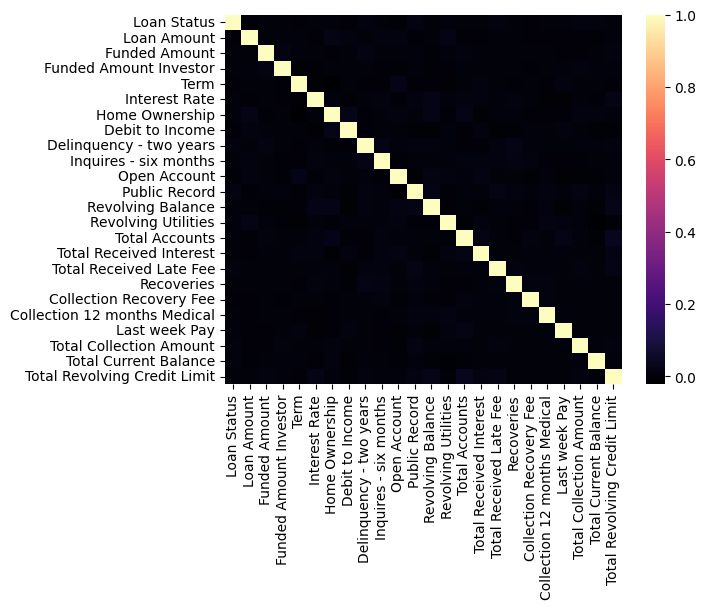

In [68]:
# Plot correlation matrix
sns.heatmap(train_corr, cmap='magma')

Seems like all variables have a week correlation between Loan Status and all other numerical features. 

## Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

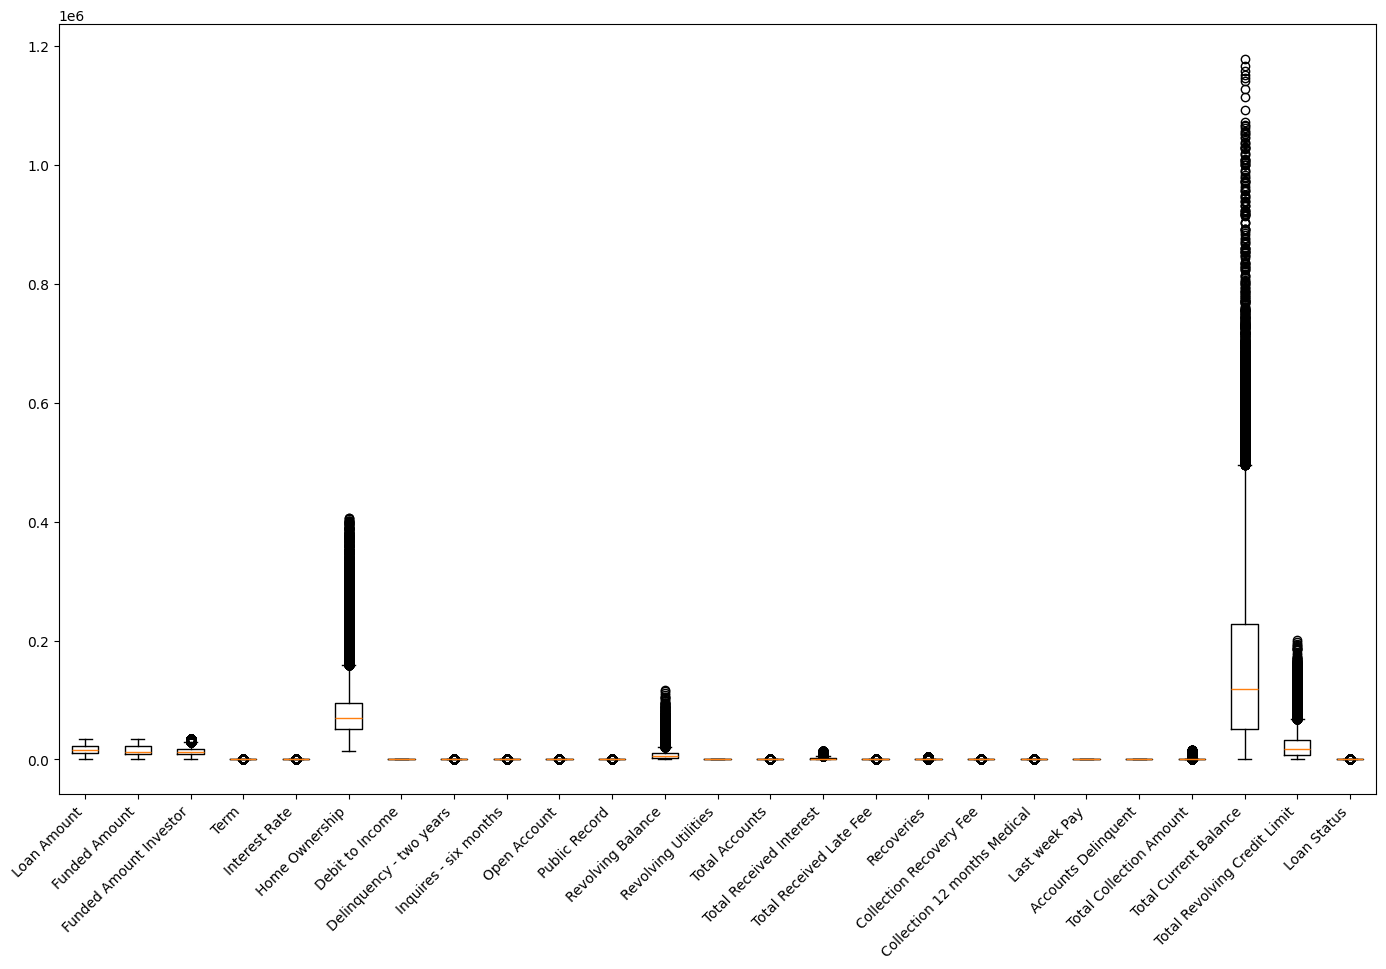

In [80]:
# Plot boxplot
train_boxplot = train.drop('ID', axis=1)
train_boxplot = train_boxplot.select_dtypes(include=np.number)

plt.figure(figsize=(17,10))
plt.boxplot(train_boxplot, tick_labels=train_boxplot.columns)
plt.xticks(rotation=45, ha='right')
plt.show